In [2]:
%matplotlib inline
from utils import *
from matplotlib.collections import LineCollection

## Neuron params

In [3]:
# Default params
R_m = 142 * 1e6                                     # 142 MΩ
V_th = 15 * 1e-3                                    # 15 mV
tau_m = 24 * 1e-3                                   # 24 ms
f = 5                                               # 5 Hz
omega = 2 * np.pi * f                               # 5 Hz in rad/s
I_osc = 40 * 1e-12                                  # 40 pA
M = 5                                               # number of input levels
range_frac = 0.999                                  # fraction of range to use
sigma_w_avg = 0.0135                                # average sigma_w
eta = sigma_w_to_eta(sigma_w_avg, V_th, tau_m, f)   # noise strength (default: 0.14)

## A - Phase-locking transfer function

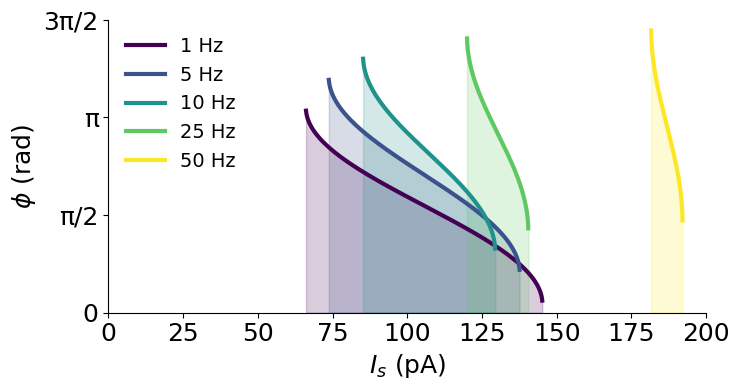

In [4]:
fs = [1, 5, 10, 25, 50]

colors = cm.viridis(np.linspace(0, 1, len(fs)))

plt.figure(figsize=(7.5, 4))

for i, f in enumerate(fs):
    omega = 2 * np.pi * f
    
    Is_min, Is_max = get_automatic_range(R_m, V_th, tau_m, omega, I_osc, range_frac)
    I_s = np.linspace(Is_min, Is_max, 1000)
    phis = compute_mean_phi(R_m, V_th, tau_m, omega, I_s, I_osc)
    
    plt.plot(I_s * 1e12, phis, linewidth=3, c=colors[i], label=str(f)+' Hz')
    
    # Highlight the area under the curve for the first and last frequencies
    plt.fill_between(I_s * 1e12, 0, phis, color=colors[i], alpha=0.2)

    # Calculate y-values for the vertical lines
    #phi_min = compute_mean_phi(R_m, V_th, tau_m, omega, np.array([Is_min]), I_osc)[0]
    #phi_max = compute_mean_phi(R_m, V_th, tau_m, omega, np.array([Is_max]), I_osc)[0]
    
    #plt.axvline(Is_min * 1e12, ymin=0, ymax=phi_min / ((3/2)*np.pi), color=colors[i], linestyle='--', alpha=0.8, linewidth=1)
    #plt.axvline(Is_max * 1e12, ymin=0, ymax=phi_max / ((3/2)*np.pi), color=colors[i], linestyle='--', alpha=0.8, linewidth=1)

plt.ylabel('$\phi$ (rad)', fontsize=18)    
plt.xlabel('$I_s$ (pA)', fontsize=18)  
    
plt.yticks(np.linspace(0, 2*np.pi, 5), ['0', 'π/2', 'π', '3π/2', '2π'], fontsize=18)
plt.xticks(fontsize=18)

plt.ylim(0, (3/2)*np.pi)

plt.xlim(0,200)

plt.legend(frameon=False, fontsize=14)
    
sb.despine()

plt.tight_layout()

plt.savefig('plots/fig2/fig2A_arccos_transfers.svg', dpi=600)

plt.show()

## B - Average I_s increases with frequency

In [53]:
fs = np.linspace(1,50,1000)
Is_avgs = get_avg_Is(V_th, R_m, tau_m, fs) 

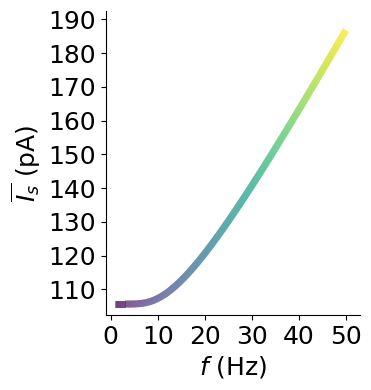

In [54]:
# Create a colormap
colors = cm.viridis(np.linspace(0, 1, len(fs)))

# Create line segments for plotting
points = np.array([fs, Is_avgs * 1e12]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection from the segments and colors
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0, 1))
lc.set_array(np.linspace(0, 1, len(fs)))
lc.set_linewidth(5)

# Plotting
plt.figure(figsize=(3.8, 4))
ax = plt.gca()
ax.add_collection(lc)
ax.set_xlim(-1, 53)
ax.set_ylim((Is_avgs * 1e12).min()*0.97, (Is_avgs * 1e12).max()*1.03)

plt.ylabel(r'$\overline{I_s}$ (pA)', fontsize=18)    
plt.xlabel('$f$ (Hz)', fontsize=18)  
    
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

sb.despine()

plt.tight_layout()

plt.savefig('plots/fig2/fig2B_avgIs.svg', dpi=600)

plt.show()

## C - I_s range decreases with frequency

In [55]:
fs = np.linspace(1,50,1000)
Is_ranges = get_total_Is_range(I_osc, fs, tau_m)

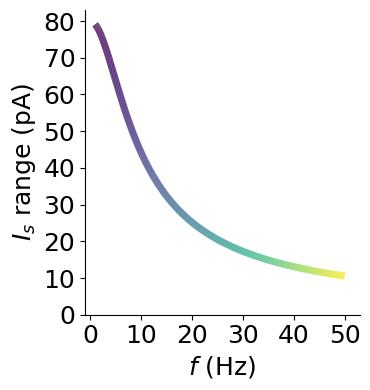

In [56]:
# Create a colormap
colors = cm.viridis(np.linspace(0, 1, len(fs)))

# Create line segments for plotting
points = np.array([fs, Is_ranges * 1e12]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection from the segments and colors
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0, 1))
lc.set_array(np.linspace(0, 1, len(fs)))
lc.set_linewidth(5)

# Plotting
plt.figure(figsize=(3.8, 4))
ax = plt.gca()
ax.add_collection(lc)
ax.set_xlim(fs.min(), fs.max())
ax.set_ylim(0, (Is_ranges * 1e12).max())

plt.ylabel('$I_s$ range (pA)', fontsize=18)    
plt.xlabel('$f$ (Hz)', fontsize=18)  
    
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.ylim(0, 83)
plt.xlim(-1, 53)

sb.despine()

plt.tight_layout()

plt.savefig('plots/fig2/fig2C_Is_ranges.svg', dpi=600)

plt.show()

## D - Effective membrane oscillation decreases with frequency (los-pass filter)

In [57]:
fs = np.linspace(1,50,1000)
amps = amplitude_mem_potential(R_m, I_osc, tau_m, fs)

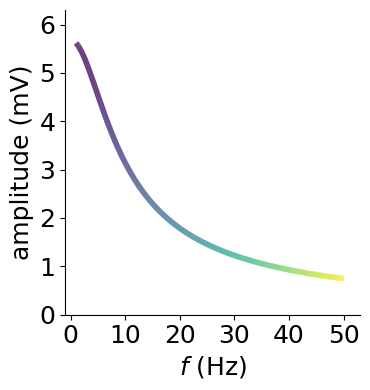

In [60]:
# Create a colormap
colors = cm.viridis(np.linspace(0, 1, len(fs)))

# Create line segments for plotting
points = np.array([fs, amps * 1e3]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection from the segments and colors
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0, 1))
lc.set_array(np.linspace(0, 1, len(fs)))
lc.set_linewidth(4)

# Plotting
plt.figure(figsize=(3.8, 4))
ax = plt.gca()
ax.add_collection(lc)
ax.set_xlim(fs.min(), fs.max())
ax.set_ylim((amps * 1e3).min(), (amps * 1e3).max())

plt.xlabel('$f$ (Hz)', fontsize=18)
plt.ylabel('amplitude (mV)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 6.3)
plt.xlim(-1, 53)

sb.despine()

plt.tight_layout()

plt.savefig('plots/fig2/fig2D_memOscAmp.svg', dpi=600)

plt.show()